In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)

### Mean Squared Error of Q-Estimation

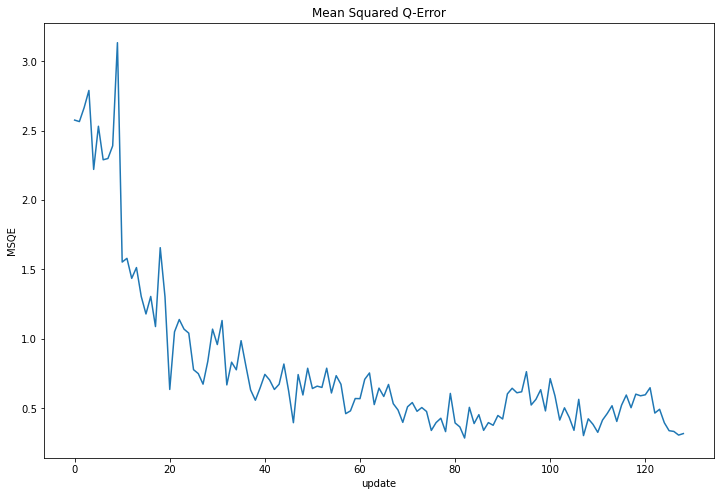

In [71]:
msqe = np.loadtxt("./logs/defect.log")

fig, ax = plt.subplots()

ax.plot(msqe)

ax.set_title("Mean Squared Q-Error")
ax.set_xlabel("update")
ax.set_ylabel("MSQE")

plt.show()

### Runtime

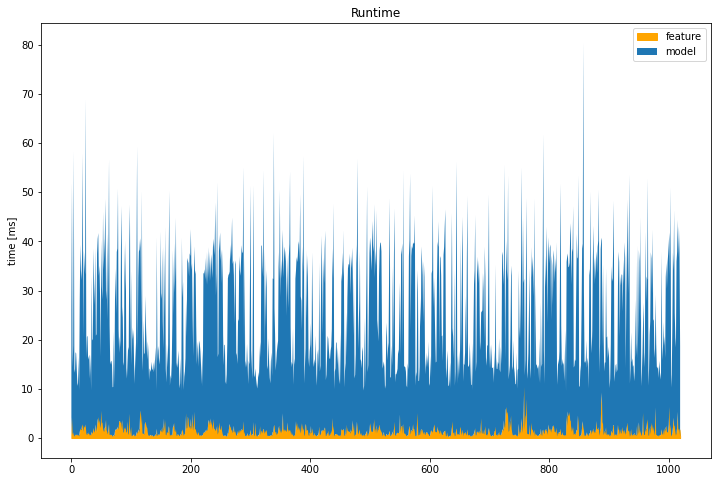

In [70]:
timings = np.loadtxt("./logs/timing.log", delimiter=',')

t_feature = timings[:,0] * 1000
t_model = timings[:, 1] * 1000

fig, ax = plt.subplots()

ax.fill_between(range(len(t_feature)), t_feature, color='orange', label="feature")
ax.fill_between(range(len(t_feature)), t_feature , t_feature + t_model, label="model")

ax.set_title("Runtime")
ax.set_ylabel("time [ms]")
ax.legend()

plt.show()